In [1]:
import numpy as np
import matplotlib.pyplot as plt
import brian2 as b2
import math
from brian2 import *
from neurodynex.tools import input_factory, plot_tools

start_scope() 
# Descrição dos parâmetros
tau = 500*ms
simulation_time = 2000*ms
num_inputs = 10
input_rate = 20*Hz
weight = 0.1

# Use this list to store output rates
output_rates = []

# Constructing the network 
P = PoissonGroup(num_inputs, rates=input_rate, dt = 0.01*ms)

# Descrição do modelo neurônio 
eqs = '''
dv/dt = -v/tau : 1
'''
G = NeuronGroup(1, eqs, threshold='v>1', reset='v=0', method='exact')

statemon = StateMonitor(G, ["v"], record=True) # monitor de potencial
spikemon = SpikeMonitor(G, variables='v') # monitor de spikes

S = Synapses(P, G, on_pre='v += weight')
S.connect()

statemon = StateMonitor(G, 'v', record=True) # monitor de potencial
spikemon = SpikeMonitor(G, 'v') # monitor de spikes
# Run it and store the output firing rate in the list
run(simulation_time)

print("Number of spikes: %s" % spikemon.count[:])
print("Spike times: %s" % spikemon.t[:])

fig = figure(figsize=(15, 5))
plt.plot(statemon.t/b2.ms, statemon.v[0]/b2.mV, c='C3', lw=1)
xlabel('time [ms]')
ylabel('Membrane potential [mV]')

vector = list()
spikes = spikemon.count[:]
inter = full(len(spikes[:]), nan)
for idx in range(len(spikes)):
    for k in range(len(spikemon.t)-1):
        inter[idx] = (float(spikemon.spike_trains()[idx][k+1]) - float(spikemon.spike_trains()[idx][k]));
        vector.append(inter[idx])
            
print vector
fig = figure(figsize=(10, 5))
hist(vector, 5 , facecolor = 'k')
xlabel('ISI')

isi_mu = mean(vector)
isi_std = std(vector)
CV = isi_std*100/isi_mu
print("The Coefficient of Variation (CV) is in percetange of: %s" % CV)

WARNING    Note that the synaptic pathway 'synapses_pre' will run on the clock of the group 'poissongroup' using a dt of 10. us. Either the Synapses object 'synapses' or the target 'neurongroup' (or both) are using a different dt. This might lead to unexpected results. In particular, all delays will be rounded to multiples of 10. us. If in doubt, try to ensure that 'poissongroup', 'synapses', and 'neurongroup' use the same dt. [brian2.synapses.synapses.synapses_dt_mismatch]


Number of spikes: [37]
Spike times: [ 0.0722  0.1544  0.2058  0.2536  0.2855  0.3323  0.3886  0.4163  0.4475
  0.5001  0.5438  0.6106  0.6642  0.7325  0.7754  0.824   0.8802  0.9395
  1.0075  1.0558  1.1238  1.1935  1.2341  1.2738  1.3353  1.4136  1.4965
  1.5385  1.6107  1.6538  1.7155  1.7779  1.8282  1.8584  1.9214  1.954
  1.9923] s
[0.082200000000000009, 0.051400000000000001, 0.047799999999999981, 0.031900000000000039, 0.046800000000000008, 0.056299999999999961, 0.027700000000000002, 0.031200000000000006, 0.05259999999999998, 0.043700000000000072, 0.066799999999999971, 0.053599999999999981, 0.068300000000000027, 0.042900000000000049, 0.048599999999999977, 0.056200000000000028, 0.059299999999999908, 0.06800000000000006, 0.04830000000000001, 0.06800000000000006, 0.069699999999999873, 0.040599999999999969, 0.039700000000000069, 0.06150000000000011, 0.078299999999999814, 0.082900000000000196, 0.041999999999999815, 0.072200000000000042, 0.043100000000000138, 0.061699999999999866, 0.062

Number of spikes: [18]
Spike times: [ 0.0489  0.128   0.1986  0.2787  0.3374  0.3964  0.4423  0.4814  0.5163
  0.5792  0.6156  0.6589  0.7054  0.7831  0.8517  0.8915  0.9376  0.9826] s


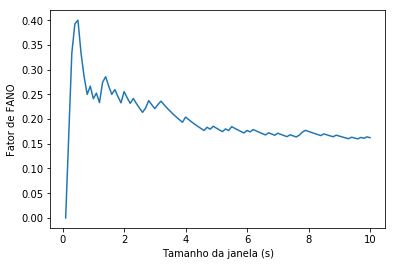

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import brian2 as b2
import math
from brian2 import *
from neurodynex.tools import input_factory, plot_tools

start_scope() 
# Descrição dos parâmetros
tau = 500*ms
simulation_time = 1000*ms
num_inputs = 10
input_rate = 20*Hz
weight = 0.1

# Use this list to store output rates
output_rates = []

# Constructing the network 
P = PoissonGroup(num_inputs, rates=input_rate, dt = 0.01*ms)

# Descrição do modelo neurônio 
eqs = '''
dv/dt = -v/tau : 1
'''
G = NeuronGroup(1, eqs, threshold='v>1', reset='v=0', method='exact')

statemon = StateMonitor(G, ["v"], record=True) # monitor de potencial
spikemon = SpikeMonitor(G, variables='v') # monitor de spikes

S = Synapses(P, G, on_pre='v += weight')
S.connect()

statemon = StateMonitor(G, 'v', record=True) # monitor de potencial
spikemon = SpikeMonitor(G, 'v') # monitor de spikes
# Run it and store the output firing rate in the list
run(simulation_time)

print("Number of spikes: %s" % spikemon.count[:])
print("Spike times: %s" % spikemon.t[:])

aux=[]
win = []
fano = []
for k in range(100):
    state_monitor = b2.StateMonitor(G, ["v"], record=True)
    spike_monitor = b2.SpikeMonitor(G)
    b2.run(100*b2.ms)
    win.append(100000*b2.ms*(k+1)*b2.ms)
    aux.append(spike_monitor.count[:])
    mean = np.mean(aux)
    var = np.var(aux)
    fano.append(var/mean)
plt.figure()
plt.plot(win, fano)
plt.xlabel('Tamanho da janela (s)')
plt.ylabel('Fator de FANO')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import brian2 as b2
import math
from brian2 import *
from neurodynex.tools import input_factory, plot_tools

start_scope() 
# Descrição dos parâmetros
tau = 500*ms
simulation_time = 1000*ms
num_inputs = 10
input_rate = 20*Hz
weight = 0.1

# Use this list to store output rates
output_rates = []

# Constructing the network 
P = PoissonGroup(num_inputs, rates=input_rate, dt = 0.01*ms)

# Descrição do modelo neurônio 
eqs = '''
dv/dt = -v/tau : 1
'''
G = NeuronGroup(1, eqs, threshold='v>1', reset='v=0', method='exact')

statemon = StateMonitor(G, ["v"], record=True) # monitor de potencial
spikemon = SpikeMonitor(G, variables='v') # monitor de spikes

S = Synapses(P, G, on_pre='v += weight')
S.connect()

statemon = StateMonitor(G, 'v', record=True) # monitor de potencial
spikemon = SpikeMonitor(G, 'v') # monitor de spikes
# Run it and store the output firing rate in the list
run(simulation_time)

print("Number of spikes: %s" % spikemon.count[:])
print("Spike times: %s" % spikemon.t[:])

auxi=[]
win=[]
fano=[]
for z in range(100):
    state_monitor = b2.StateMonitor(G, ["v"], record=True)
    spike_monitor = b2.SpikeMonitor(G)
    b2.run(10*(z+1)*b2.ms)
    win.append(10*(z+1))
    print(spike_monitor.t[:])
    print(spike_monitor.count[:])
    auxi.append(spike_monitor.count[:])
    mean = np.mean(auxi)
    print(mean)
    var = np.var(auxi)
    print(var)
    print("FANO: {}".format(var/mean))
    fano.append(var/mean)

plt.figure()
plt.plot(win, fano)
plt.xlabel('Tamanho da janela (ms)')
plt.ylabel('Fator de FANO')
plt.show()

Number of spikes: [19]
Spike times: [ 0.0478  0.1021  0.1408  0.2104  0.2533  0.2984  0.3464  0.3634  0.4151
  0.4793  0.5355  0.6127  0.6714  0.7074  0.735   0.7913  0.8681  0.9495
  0.9781] s


WARNING    C:\Users\adm\Miniconda2\envs\bmnn\lib\site-packages\ipykernel_launcher.py:57: RuntimeWarning: invalid value encountered in double_scalars
 [py.warnings]
WARNING    C:\Users\adm\Miniconda2\envs\bmnn\lib\site-packages\ipykernel_launcher.py:58: RuntimeWarning: invalid value encountered in double_scalars
 [py.warnings]


[] s
[0]
0.0
0.0
FANO: nan
[ 1.0123] s
[1]
0.5
0.25
FANO: 0.5
[ 1.0395] s
[1]
0.666666666667
0.222222222222
FANO: 0.333333333333
[ 1.0876] s
[1]
0.75
0.1875
FANO: 0.25
[ 1.1387] s
[1]
0.8
0.16
FANO: 0.2
[ 1.1978] s
[1]
0.833333333333
0.138888888889
FANO: 0.166666666667
[ 1.2734] s
[1]
0.857142857143
0.122448979592
FANO: 0.142857142857
[ 1.3569] s
[1]
0.875
0.109375
FANO: 0.125
[ 1.4036] s
[1]
0.888888888889
0.0987654320988
FANO: 0.111111111111
[ 1.4713  1.527 ] s
[2]
1.0
0.2
FANO: 0.2
[ 1.5708  1.6205] s
[2]
1.09090909091
0.264462809917
FANO: 0.242424242424
[ 1.6724  1.7312  1.7693] s
[3]
1.25
0.520833333333
FANO: 0.416666666667
[ 1.8061  1.8405  1.9042] s
[3]
1.38461538462
0.698224852071
FANO: 0.504273504274
[ 1.9299  2.0106] s
[2]
1.42857142857
0.673469387755
FANO: 0.471428571429
[ 2.0723  2.127   2.1899] s
[3]
1.53333333333
0.782222222222
FANO: 0.510144927536
[ 2.259   2.3132] s
[2]
1.5625
0.74609375
FANO: 0.4775
[ 2.3639  2.4105  2.4655  2.5249] s
[4]
1.70588235294
1.03114186851
FA

[ 29.5273  29.5739  29.6132  29.6779  29.7413  29.7759  29.8233  29.8826
  29.9433  29.9867  30.0298  30.0744  30.1279  30.1727  30.2049] s
[15]
6.86842105263
15.6932132964
FANO: 2.28483565235
[ 30.2724  30.3176  30.3807  30.4305  30.514   30.5537  30.6105  30.6922
  30.7704  30.8273  30.8534  30.9314  31.003 ] s
[13]
6.94805194805
15.9713273739
FANO: 2.29867702391
[ 31.0697  31.1063  31.134   31.2057  31.2629  31.3159  31.3917  31.4155
  31.4612  31.5515  31.6074  31.6626  31.7314  31.7807] s
[14]
7.03846153846
16.3959566075
FANO: 2.32948017374
[ 31.8452  31.9033  31.9503  31.9834  32.0297  32.0791  32.1553  32.1932
  32.2415  32.3071  32.3384  32.3761  32.4376  32.4679  32.5447] s
[15]
7.13924050633
16.9806120814
FANO: 2.37848999012
[ 32.6112  32.6627  32.7343  32.7916  32.8371  32.8738  32.9592  33.0149
  33.0762  33.1726  33.2326  33.2875  33.3227  33.362 ] s
[14]
7.225
17.349375
FANO: 2.40129757785
[ 33.4326  33.4989  33.5473  33.578   33.6308  33.6891  33.7488  33.8237
  33.8994 